In [7]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [8]:
path = r'C:\Users\kshifera\Desktop\CF_Course\Immersion\Achievement_4\Instacart Basket Analysis'

In [9]:
# import dataframe
df = pd.read_pickle(os.path.join(path, 'df_chunk2.pkl'))

In [10]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependents,family_status,income,region,exclusion_flag,customer_profile
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,"low-income, adult"
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,"low-income, adult"
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,"low-income, adult"
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,"low-income, adult"
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,"low-income, adult"


## 9. Visualizations

### 9.1. Busiest days and hours for ordering

Text(0, 0.5, 'order count in million')

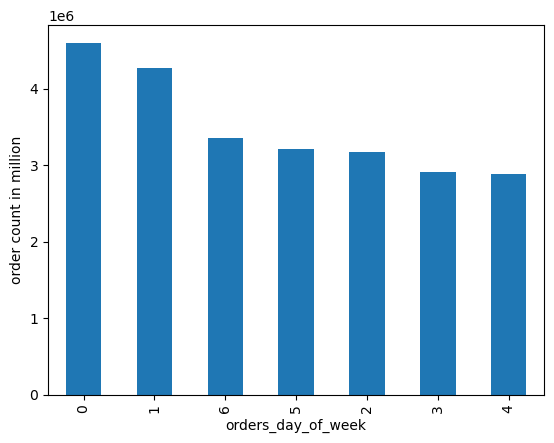

In [11]:
# Busiest days
bz_day = df['orders_day_of_week'].value_counts().plot.bar()
plt.ylabel('order count in million')

In [12]:
# Export the chart
bz_day.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'bz_day.png'))

Text(0, 0.5, 'order count in million')

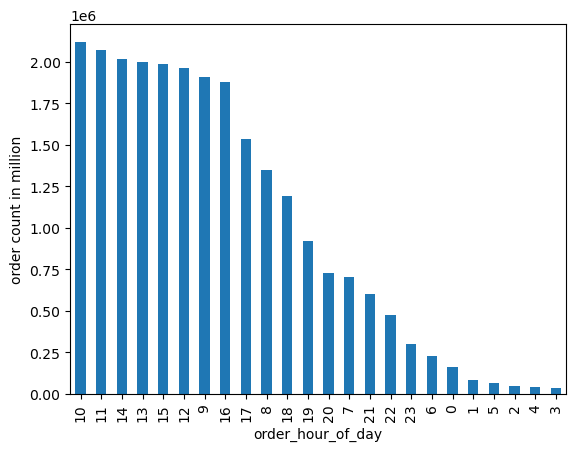

In [13]:
# Busiest hours
bz_hr = df['order_hour_of_day'].value_counts().plot.bar()
plt.ylabel('order count in million')

In [14]:
# Export the chart
bz_hr.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'bz_hr.png'))

### 9.2. Days and hours in which customers spend the most

In [15]:
# create a sample dataframe
np.random.seed(4)
dev=np.random.rand(len(df)) <= 0.8
# store 80% of the sample in the dataframe big
big = df[dev]
# store 20% of the sample in the dataframe small
small = df[~dev]

In [16]:
# create a dataframe that contains price and order_hour_of_day
df_s = small[['order_hour_of_day', 'prices']]

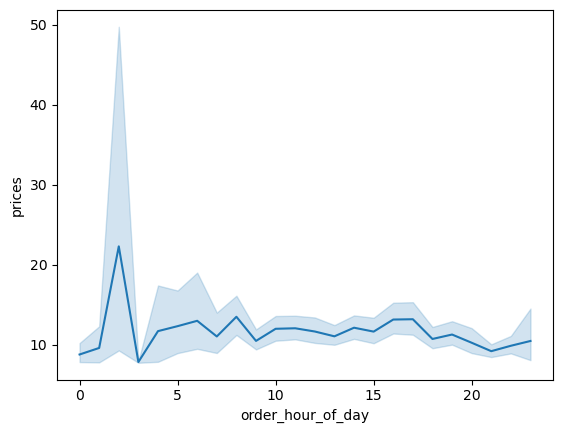

In [17]:
# plot a line graph
line = sns.lineplot(data = df_s , x = 'order_hour_of_day' , y = 'prices')

In [18]:
# Export the chart
line.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'pricey_hrs.png'))

In [19]:
# create a dataframe that contains price and orders_dat_of_day
df_d = small[['orders_day_of_week', 'prices']]

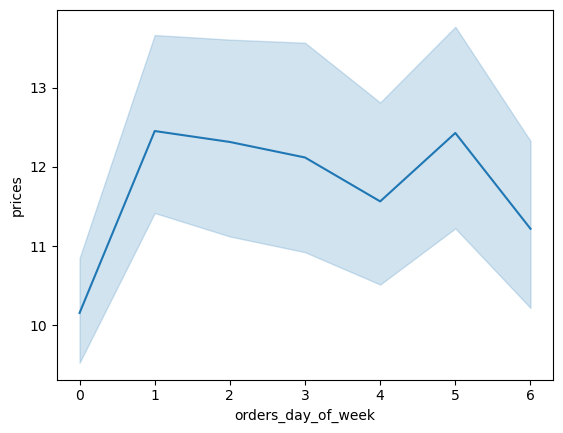

In [20]:
# plot a line graph
line = sns.lineplot(data = df_d , x = 'orders_day_of_week' , y = 'prices')

In [21]:
# Export the chart
line.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'pricey_dayz.png'))

### 9.3. Product price groupings

In [22]:
# Price classifications
df['price_range_loc'].value_counts()

price_range_loc
Mid range product     16479445
Low range product      7626745
High range product      308687
Name: count, dtype: int64

In [23]:
# Total sum of price ranges
16479445+7626745+308687

24414877

In [24]:
# Percentage of Mid range products
(16479445/24414877)*100

67.49755487197416

In [25]:
# Percentage of Low range products
(7626745/24414877)*100

31.238105356828132

In [26]:
# Percentage of High range products
(308687/24414877)*100

1.2643397711977005

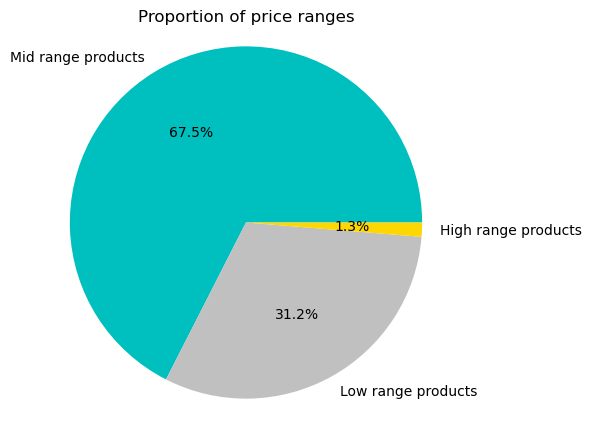

In [27]:
# plot pie chart depicting these proportions
labels = ['Mid range products' , 'Low range products' , 'High range products' ]
sizes = [67.5, 31.2, 1.3]
colors = ['c', 'silver' , 'gold']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0 )
plt.axis('equal')
plt.title('Proportion of price ranges')

# Export the chart
plt.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'price_range.png'))
        

### 9.4. Preferred departments & products

Text(0.5, 0, 'User count in million')

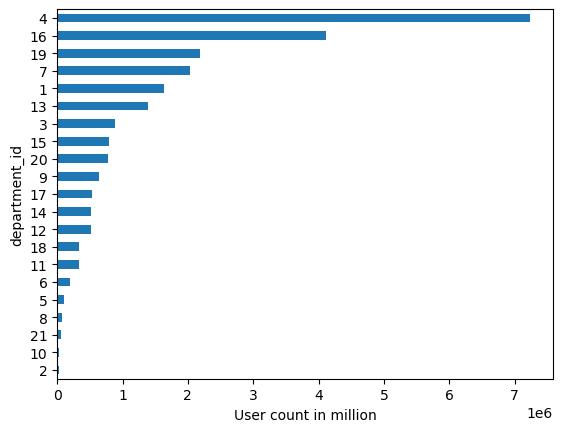

In [28]:
# preferred departments 
bar = df['department_id'].value_counts().sort_values().plot.barh()
plt.xlabel('User count in million')

In [29]:
# Export the chart
bar.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'bar_dept.png'))

Text(0, 0.5, 'products')

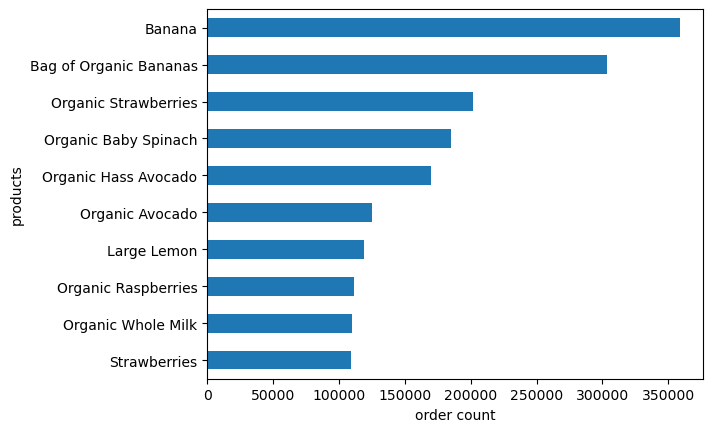

In [30]:
# Preferred products
bar = df['product_name'].value_counts(dropna = False).head(10).sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('order count')
plt.ylabel('products')  

In [65]:
# Export the chart
bar.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'bar_prod.png'), dpi=300, bbox_inches='tight')

### 9.5. Distribution of brand loyalty among customers

In [32]:
# Subset dataframe to analyze brand loyalty
df_br = df[['user_id','region','customer_profile','loyalty_flag']]

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

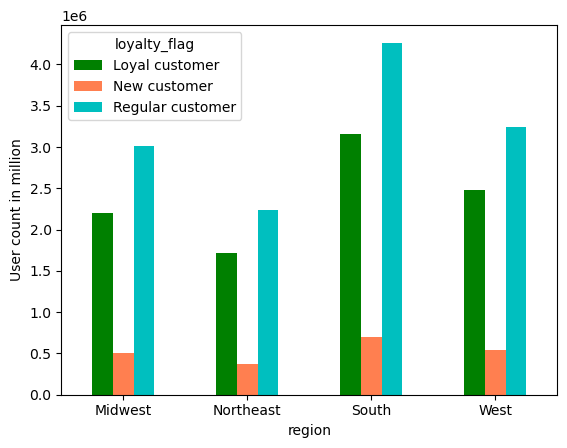

In [33]:
# Group brand loyalty by region and plot
br_gr = df_br.groupby(['region', 'loyalty_flag']).size().unstack()
x=br_gr.plot(kind='bar', color = ['g', 'coral','c'])
plt.ylabel('User count in million')
plt.xticks(rotation = 0)

In [34]:
# Export the chart
x.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'brd_reg.png'))

Text(0.5, 0, 'User count in million')

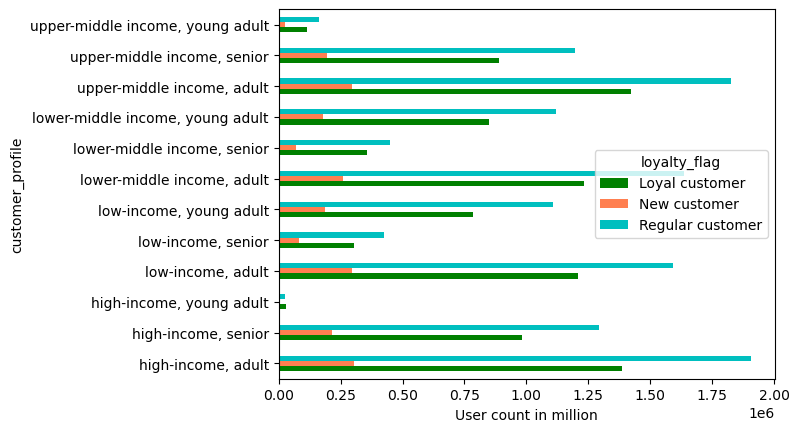

In [69]:
# Brand loyalty by customer profile 
brc_gr = df.groupby(['customer_profile' ,'loyalty_flag']).size().unstack()
y=brc_gr.plot(kind='barh', color = ['g', 'coral','c'])
plt.xlabel('User count in million')

In [70]:
# Export the chart
y.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'brd_c.png'), dpi=300, bbox_inches='tight')

### 9.6. Ordering habits based on customer loyalty

In [37]:
# Subset dataframe to analyze ordering habits based on brand loyalty
df_ol = df[['frequency_flag','customer_profile','loyalty_flag']]

(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Non-frequent customer'),
  Text(2, 0, 'Regular customer')])

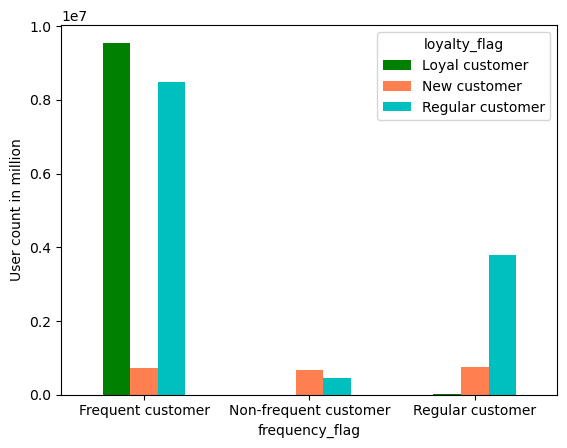

In [38]:
# Group brand loyalty by customer habits and plot
br_gr = df_ol.groupby(['frequency_flag', 'loyalty_flag']).size().unstack()
x=br_gr.plot(kind='bar', color = ['g', 'coral','c'])
plt.ylabel('User count in million')
plt.xticks(rotation = 0)

In [39]:
# Export the chart
x.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'ord_loy.png'))

### 9.7. Ordering habits based on customer region

In [40]:
# Subset dataframe to analyze brand loyalty
df_or = df[['user_id','region','customer_profile','frequency_flag']]

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

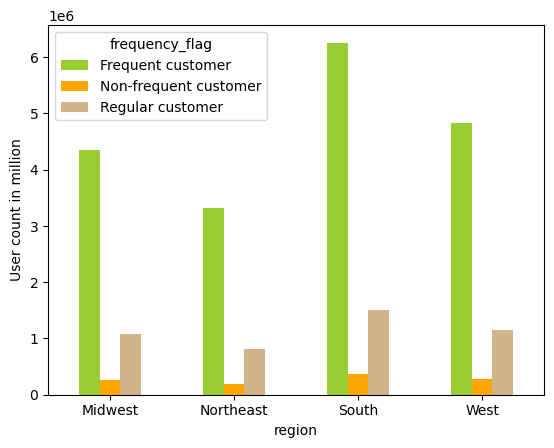

In [41]:
# Group brand loyalty by region and plot
br_gr = df_or.groupby(['region', 'frequency_flag']).size().unstack()
x=br_gr.plot(kind='bar', color = ['yellowgreen', 'orange','tan'])
plt.ylabel('User count in million')
plt.xticks(rotation = 0)

In [42]:
# Export the chart
x.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'reg_loy.png'))

### 9.8. Customer profile, family status and ordering habits

In [71]:
# Subset dataframe to analyze brand loyalty
df_do = df[['age','family_status','customer_profile','frequency_flag']]

Text(0.5, 0, 'User count in million')

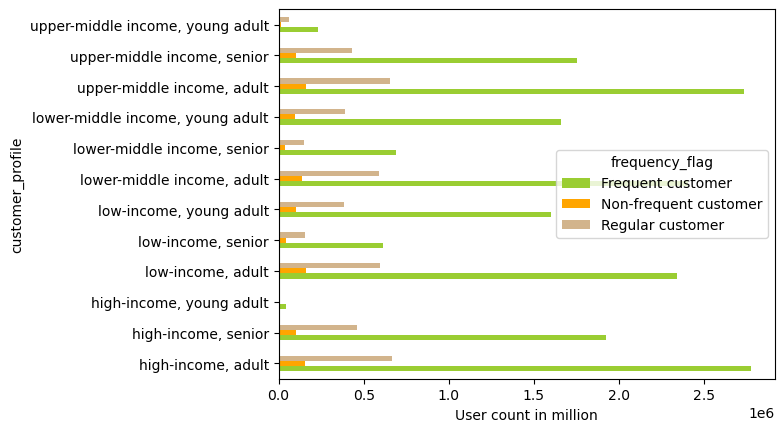

In [72]:
# Ordering habit by customer profile 
orh_gr = df.groupby(['customer_profile' ,'frequency_flag']).size().unstack()
y=orh_gr.plot(kind='barh', color = ['yellowgreen', 'orange','tan'])
plt.xlabel('User count in million')


In [73]:
# Export the chart
y.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'cus_ord.png'), dpi=300, bbox_inches='tight')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

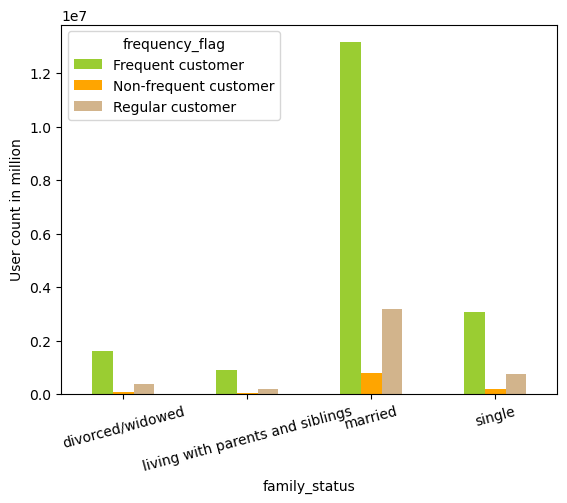

In [46]:
# Family status and ordering habits
for_gr = df.groupby(['family_status' ,'frequency_flag']).size().unstack()
y=for_gr.plot(kind='bar', color = ['yellowgreen', 'orange','tan'])
plt.ylabel('User count in million')
plt.xticks(rotation = 15)


In [63]:
# Export the chart
y.figure.savefig(os.path.join(path, path, '04 Analysis' , 'Visualizations' , 'fam_ord.png'), dpi=300, bbox_inches='tight')

### 9.9. Spending habits based on customer profiles

In [74]:
# Subset dataframe to analyze spending
df_sh = df[['customer_profile','spending_flag']]

Text(0.5, 0, 'User count in million')

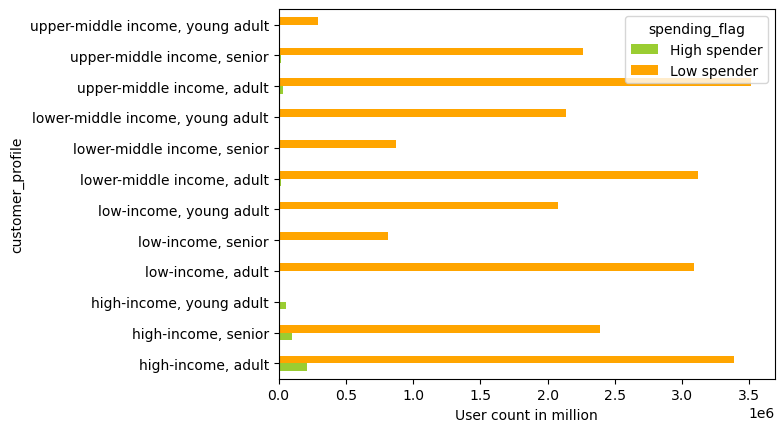

In [75]:
# Customer profile and spending habits
spd_gr = df.groupby(['customer_profile' ,'spending_flag']).size().unstack()
y=spd_gr.plot(kind='barh', color = ['yellowgreen', 'orange','tan'])
plt.xlabel('User count in million')


In [76]:
# Export the chart
y.figure.savefig(os.path.join(path, '04 Analysis' , 'Visualizations' , 'cus_spd.png'), dpi=300, bbox_inches='tight')

### 9.10. Spending habits based on customer region

In [52]:
# Subset dataframe to analyze spending
df_sr = df[['region','spending_flag']]

Text(0.5, 0, 'User count in million')

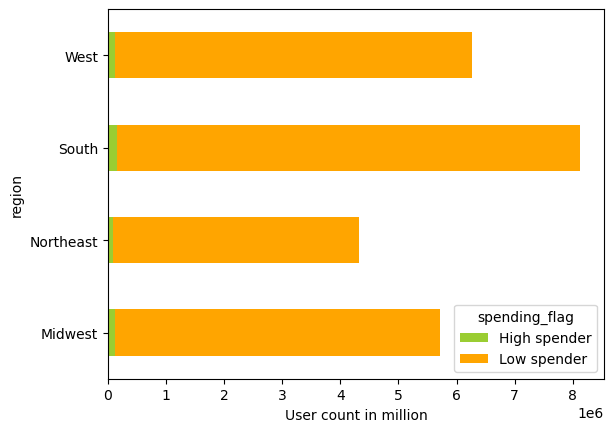

In [53]:
# Customer profile and spending habits
sr_gr = df.groupby(['region' ,'spending_flag']).size().unstack()
y=sr_gr.plot(kind='barh', stacked = True, color = ['yellowgreen', 'orange','tan'])
plt.xlabel('User count in million')

In [54]:
# Export the chart
y.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'sp_reg.png'))

-------------------------End------------------------